In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Downloads/BigBasket Products.csv')

In [4]:
df.head(12)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


In [5]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [7]:
top_sold = df['product'].value_counts().head(1)
least_sold = df['product'].value_counts().tail(1)

In [8]:
print('Top sold product:\n', top_sold)
print('Least sold product:\n', least_sold)

Top sold product:
 product
Turmeric Powder/Arisina Pudi    26
Name: count, dtype: int64
Least sold product:
 product
Water Bottle - Orange    1
Name: count, dtype: int64


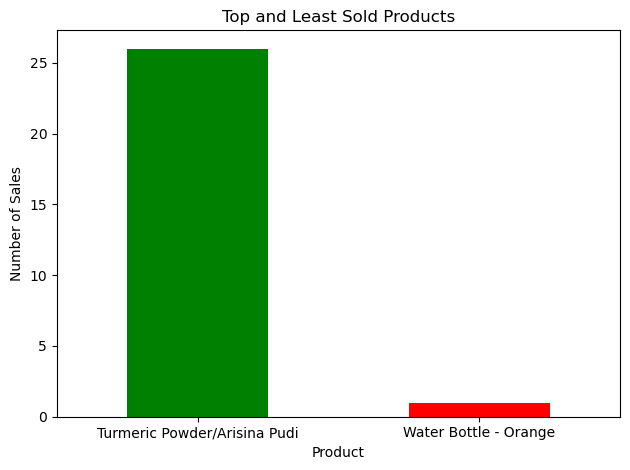

In [17]:
combin = pd.concat([top_sold, least_sold])
combin.plot(kind='bar', color=['green', 'red'])
plt.title('Top and Least Sold Products')
plt.ylabel('Number of Sales')
plt.xlabel('Product')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

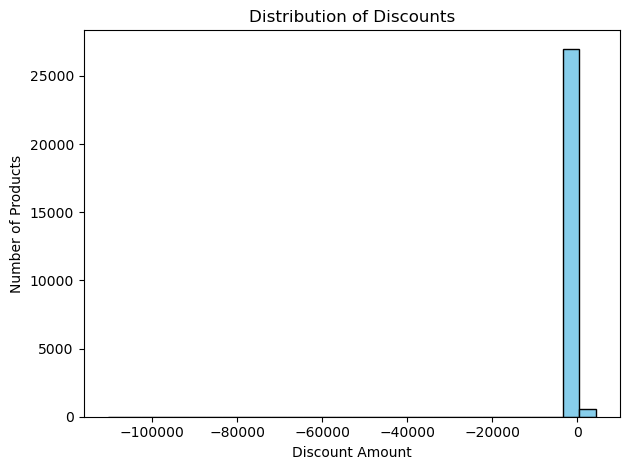

In [20]:
df['discount'] = df['market_price'] - df['sale_price']

plt.hist(df['discount'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Discounts')
plt.xlabel('Discount Amount')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

In [21]:
df.isna().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8636
description      115
discount           6
dtype: int64

In [22]:
df.isna().mean()*100

index            0.000000
product          0.003629
category         0.000000
sub_category     0.000000
brand            0.003629
sale_price       0.021775
market_price     0.000000
type             0.000000
rating          31.340954
description      0.417347
discount         0.021775
dtype: float64

In [23]:
import statistics
numerical_columns = ['sale_price', 'market_price', 'rating']

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col].mean()
    df[col] = df[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

df.to_csv('cleaned_dataset.csv', index=False)

In [25]:
print(df.head())

   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridge Bottles     2.3   

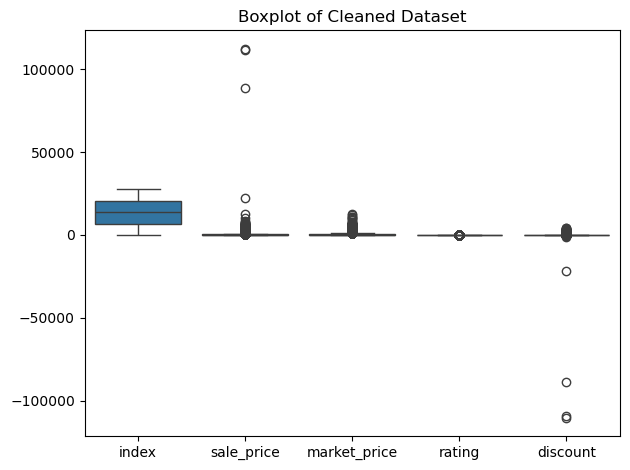

In [27]:
sns.boxplot(data=df)
plt.title("Boxplot of Cleaned Dataset")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()